In [81]:
import numpy  as np
import pandas as pd

In [82]:
df = pd.read_csv('data/development.csv').set_index('Id')
df.head()

df.drop(['sampling_rate', 'path', 'num_characters'], axis=1, inplace=True)
df['tempo'] = df['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df.drop('ethnicity', axis=1, inplace=True)
gender =  {'male': 1, 'female': 0, "famale": 0}
df['gender'] = df['gender'].map(gender)


from sklearn.model_selection import train_test_split
X = df.drop('age', axis=1)
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

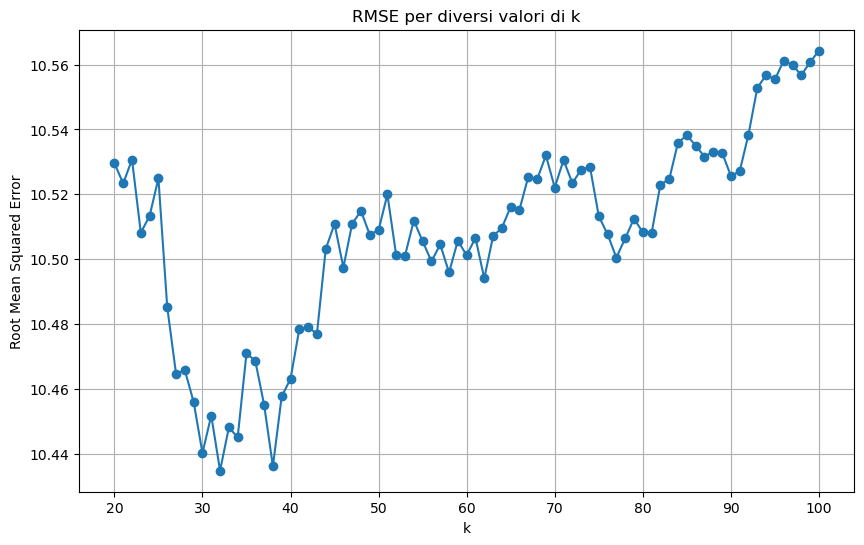

In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Creare e addestrare il modello per diversi valori di k
scaler = StandardScaler()
X_s = scaler.fit_transform(X_train)
X_t_s = scaler.transform(X_test)

import matplotlib.pyplot as plt

k_values = range(20, 101)
rmse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_s, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred = knn.predict(X_t_s)
    
    # Valutare le prestazioni del modello
    rmse = root_mean_squared_error(y_test, y_pred)  
    rmse_values.append(rmse)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('k')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE per diversi valori di k')
plt.grid(True)
plt.show()

In [84]:
min_rmse = min(rmse_values)
best_k = k_values[rmse_values.index(min_rmse)]
print(f"Il valore minimo di RMSE è: {min_rmse} e il suo corrispettivo k è: {best_k}")

Il valore minimo di RMSE è: 10.434793179497746 e il suo corrispettivo k è: 32


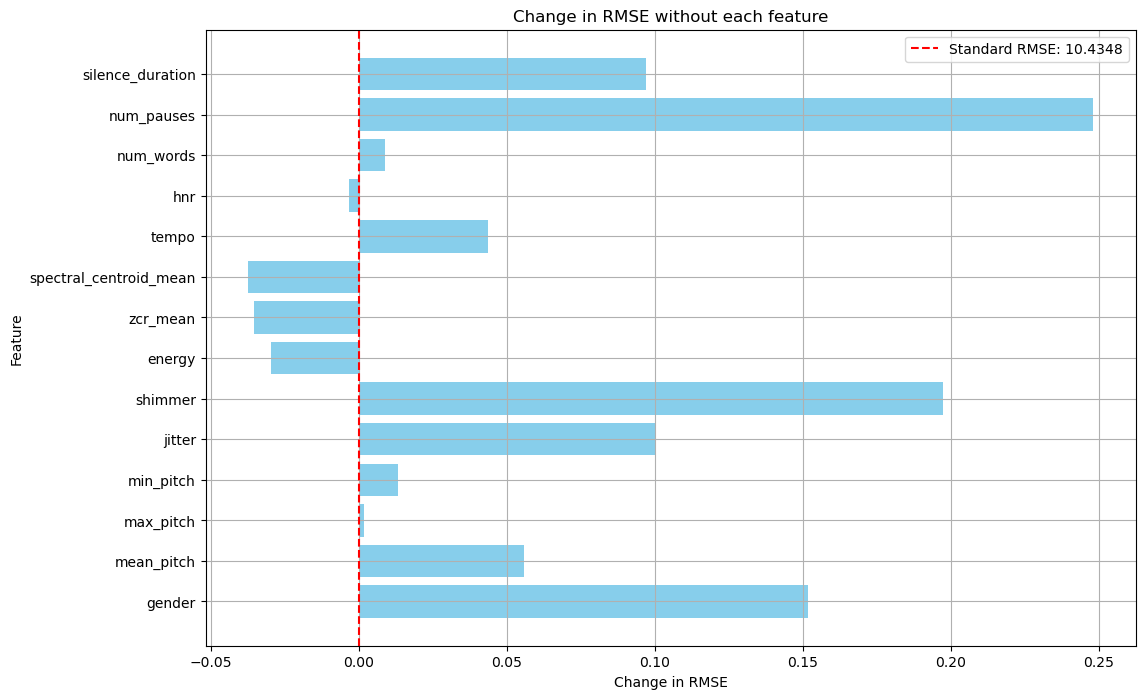

In [85]:
features = X.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

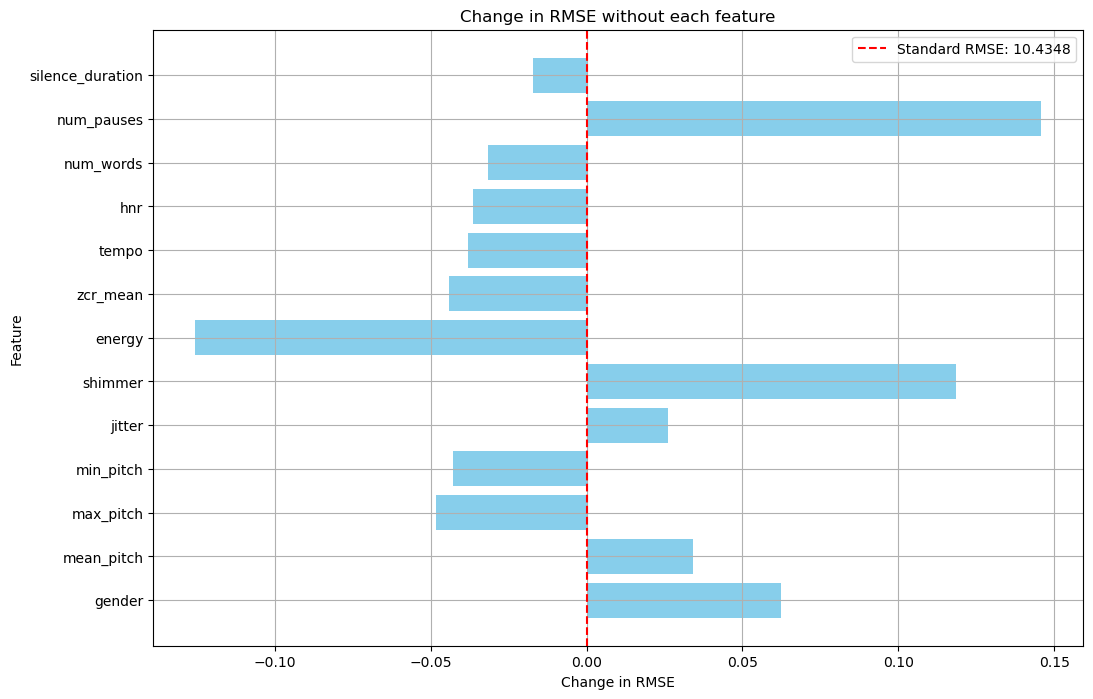

In [86]:
X_train.drop('spectral_centroid_mean', axis=1, inplace=True)
X_test.drop('spectral_centroid_mean', axis=1, inplace=True)

features = X_train.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

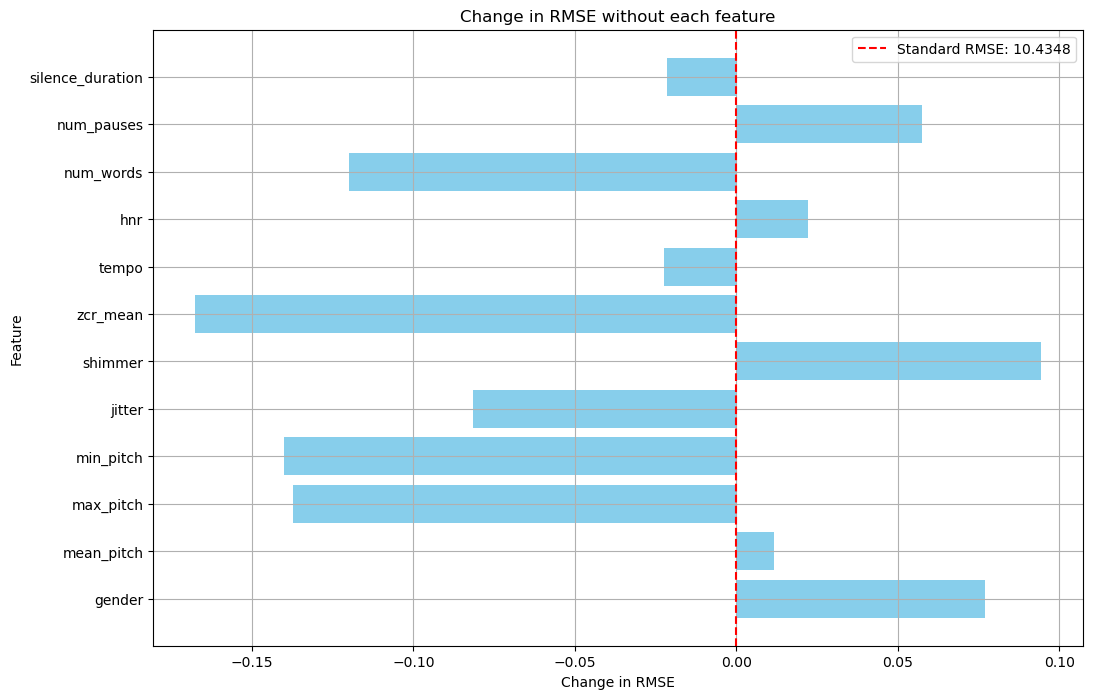

In [87]:
X_train.drop('energy', axis=1, inplace=True)
X_test.drop('energy', axis=1, inplace=True)

features = X_train.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

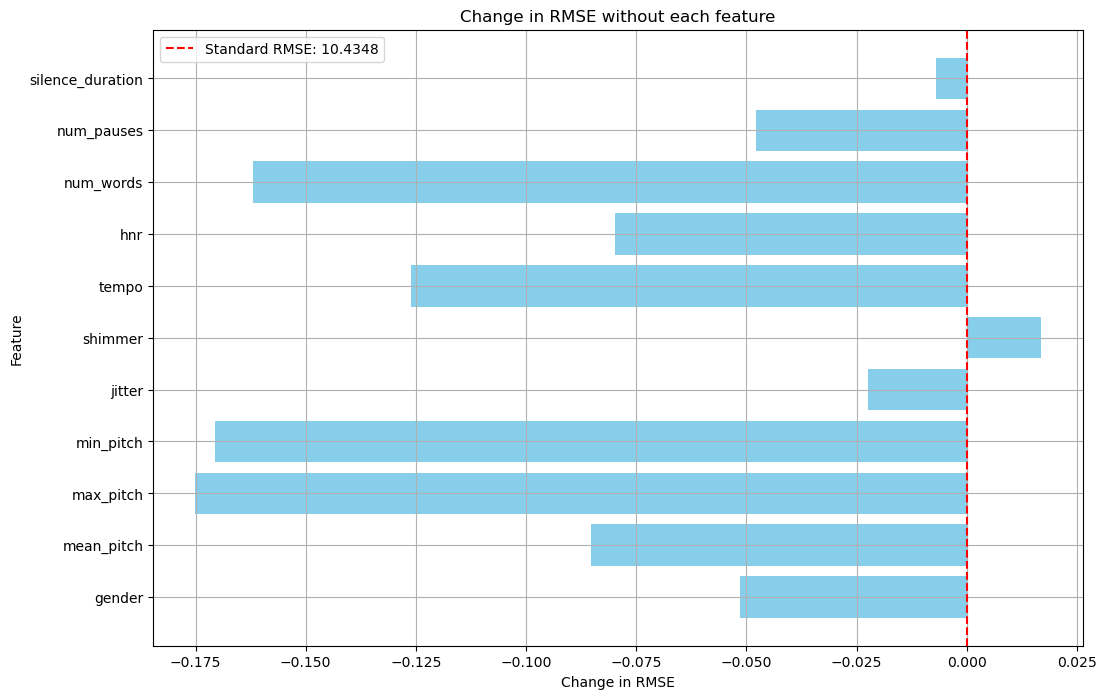

In [88]:
X_train.drop('zcr_mean', axis=1, inplace=True)
X_test.drop('zcr_mean', axis=1, inplace=True)

features = X_train.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

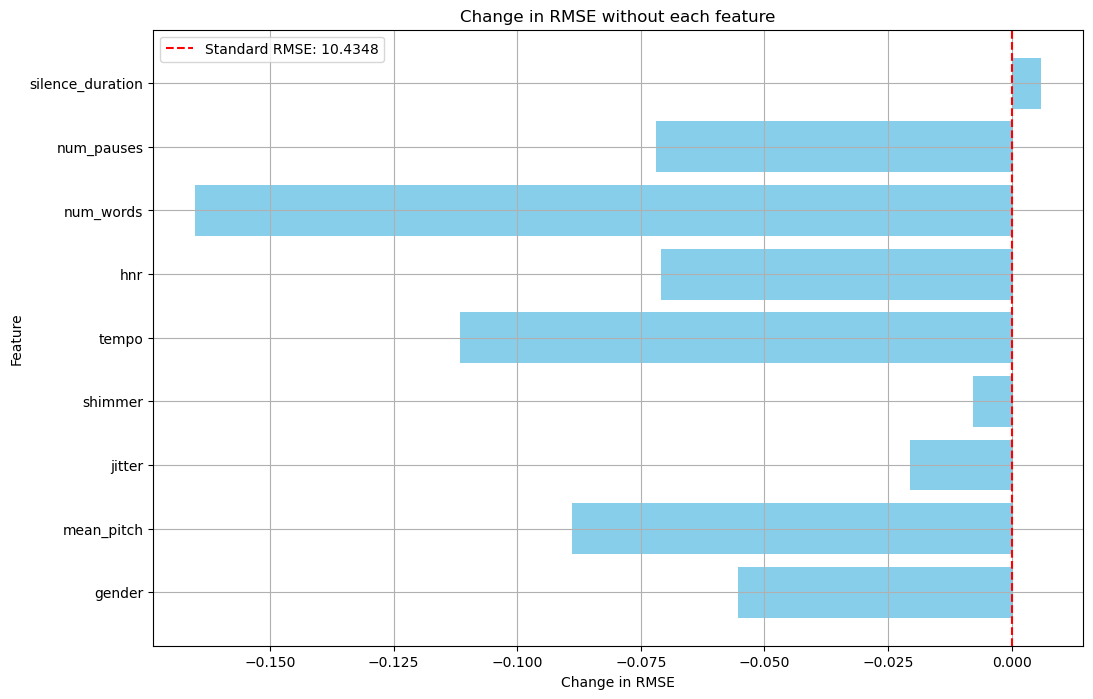

In [89]:
X_train.drop(['min_pitch', 'max_pitch'], axis=1, inplace=True)
X_test.drop(['min_pitch', 'max_pitch'], axis=1, inplace=True)

features = X_train.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

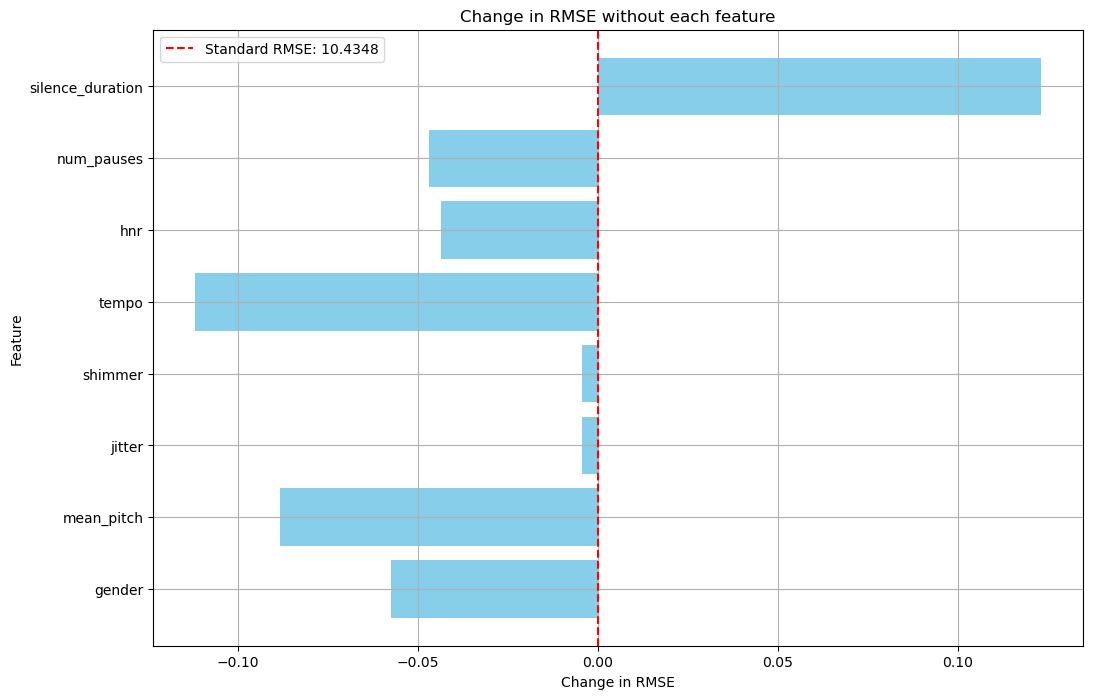

In [90]:
X_train.drop(['num_words'], axis=1, inplace=True)
X_test.drop(['num_words'], axis=1, inplace=True)

features = X_train.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

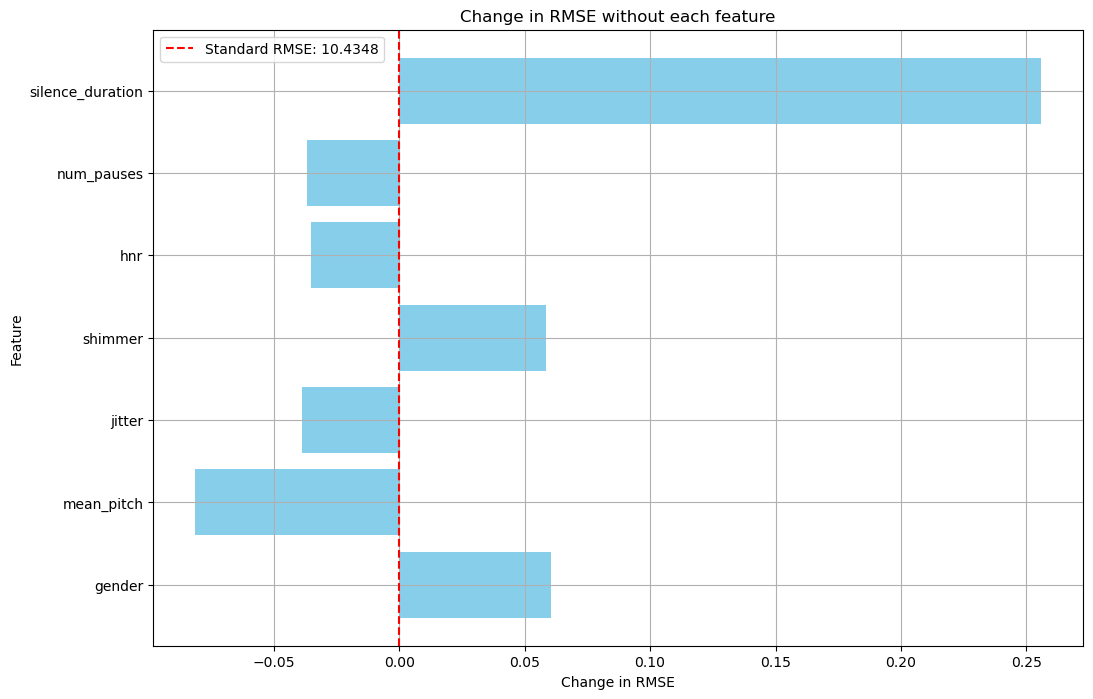

In [91]:
X_train.drop(['tempo'], axis=1, inplace=True)
X_test.drop(['tempo'], axis=1, inplace=True)

features = X_train.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

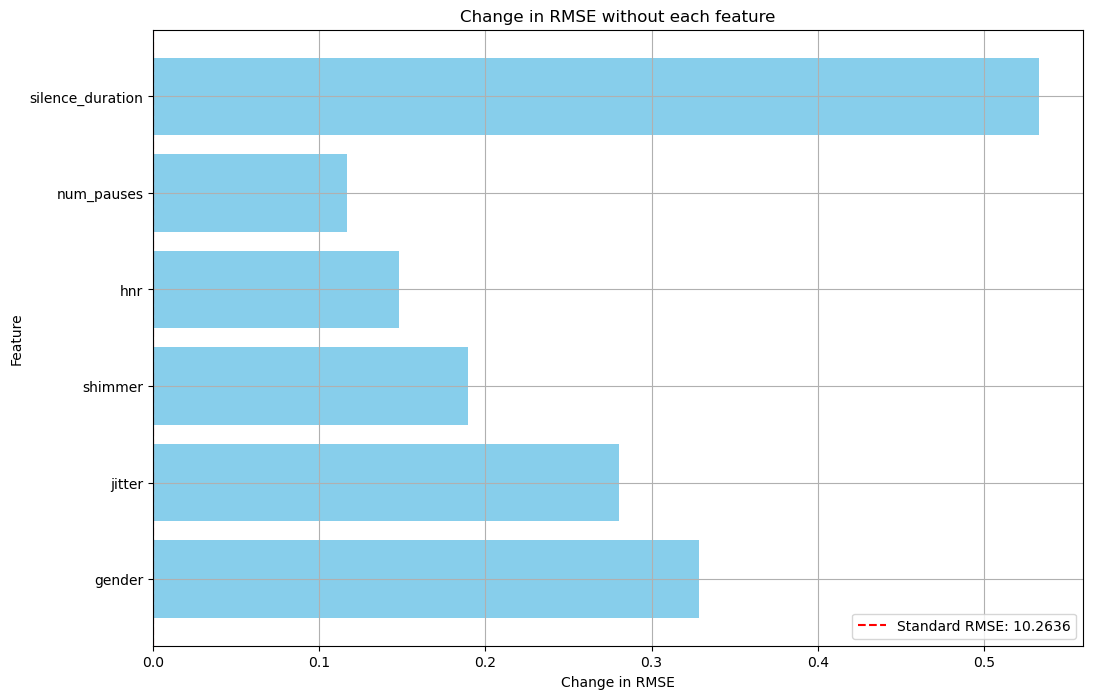

In [98]:
X_train.drop(['mean_pitch'], axis=1, inplace=True)
X_test.drop(['mean_pitch'], axis=1, inplace=True)

features = X_train.columns
rmse_without_feature = {}

for feature in features:
    X_train_temp = X_train.drop(columns=[feature])
    X_test_temp = X_test.drop(columns=[feature])
    
    # Standardizzare i dati
    X_s_temp = scaler.fit_transform(X_train_temp)
    X_t_s_temp = scaler.transform(X_test_temp)
    
    # Addestrare il modello
    knn_temp = KNeighborsRegressor(n_neighbors=best_k)
    knn_temp.fit(X_s_temp, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred_temp = knn_temp.predict(X_t_s_temp)
    
    # Calcolare l'RMSE
    rmse_temp = root_mean_squared_error(y_test, y_pred_temp)
    rmse_without_feature[feature] = rmse_temp

# Plot the RMSE values without each feature
plt.figure(figsize=(12, 8))
changes = [rmse_without_feature[feature] - min_rmse for feature in rmse_without_feature.keys()]
plt.barh(list(rmse_without_feature.keys()), changes, color='skyblue')
plt.axvline(0, color='r', linestyle='--', label=f'Standard RMSE: {min_rmse:.4f}')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Change in RMSE without each feature')
plt.legend()
plt.grid(True)
plt.show()

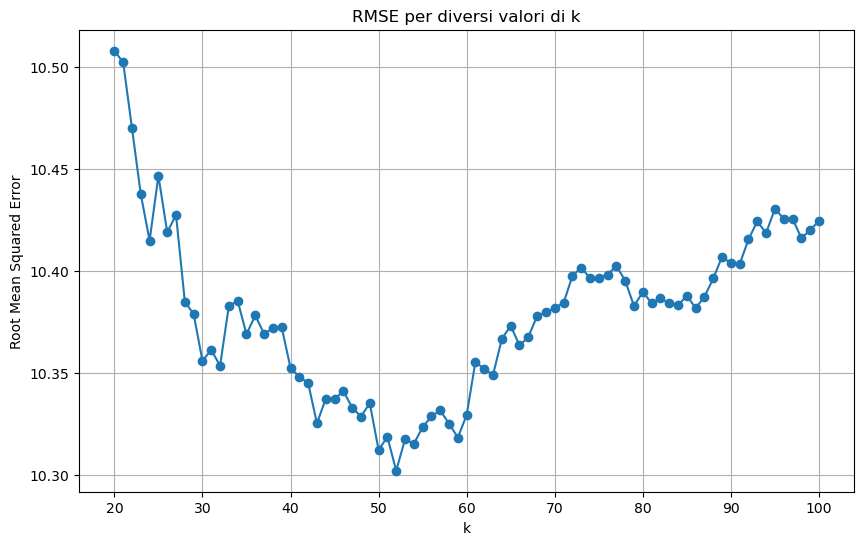

In [99]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Creare e addestrare il modello per diversi valori di k
scaler = StandardScaler()
X_s = scaler.fit_transform(X_train)
X_t_s = scaler.transform(X_test)

import matplotlib.pyplot as plt

k_values = range(20, 101)
rmse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_s, y_train)
    
    # Effettuare previsioni sui dati di test
    y_pred = knn.predict(X_t_s)
    
    # Valutare le prestazioni del modello
    rmse = root_mean_squared_error(y_test, y_pred)  
    rmse_values.append(rmse)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('k')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE per diversi valori di k')
plt.grid(True)
plt.show()

In [100]:
min_rmse = min(rmse_values)
best_k = k_values[rmse_values.index(min_rmse)]
print(f"Il valore minimo di RMSE è: {min_rmse} e il suo corrispettivo k è: {best_k}")

Il valore minimo di RMSE è: 10.302201992654421 e il suo corrispettivo k è: 52


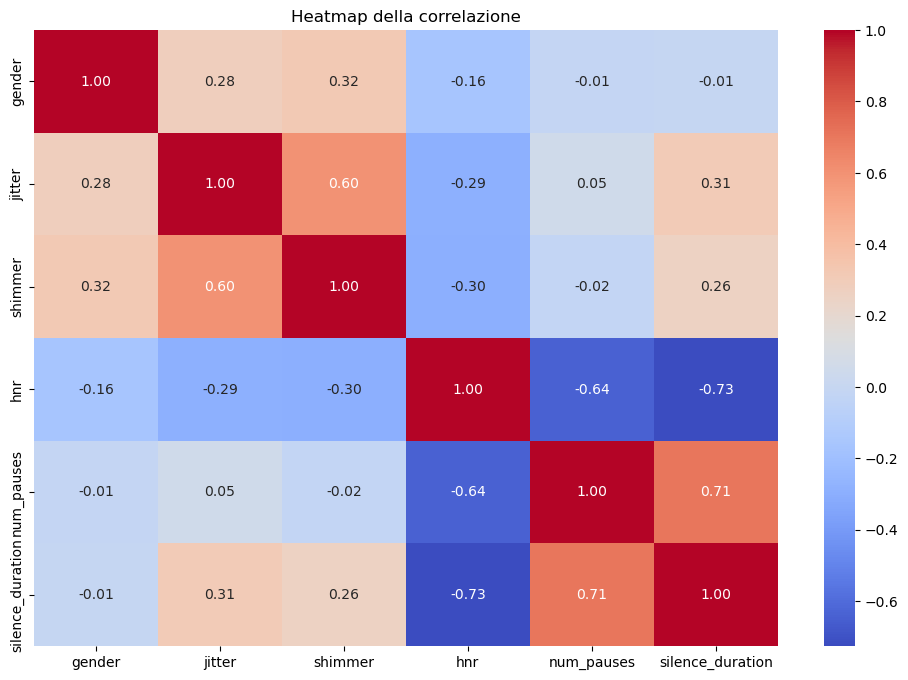

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolare la matrice di correlazione
corr_matrix = X_train.corr()

# Creare la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap della correlazione')
plt.show()

In [102]:
cols = X_train.columns

df = pd.read_csv('data/development.csv').set_index('Id')
y = df['age']
X = df.drop('age', axis=1)
X = X[cols]
X['gender'] = X['gender'].map(gender)

scaler = StandardScaler()
knn = KNeighborsRegressor(n_neighbors=best_k)

X_s = scaler.fit_transform(X)   
knn.fit(X_s, y) 

KNeighborsRegressor(n_neighbors=52)

In [103]:

ef = pd.read_csv('data/evaluation.csv').set_index('Id') 
ef = ef[cols]
ef['gender'] = ef['gender'].map(gender)

X_ef = scaler.transform(ef)
y_pred = knn.predict(X_ef)

output = pd.DataFrame({'Id': ef.index, 'Predicted': y_pred}).to_csv('out/knn.csv', index=False)


In [104]:
cols

Index(['gender', 'jitter', 'shimmer', 'hnr', 'num_pauses', 'silence_duration'], dtype='object')